In [70]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import seaborn as sns
from scipy.stats import boxcox
import re
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Creating dataframe
df = pd.read_csv('US_Accidents_Dec20_updated.csv')
df.head(3)

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-2716600         3  2016-02-08 00:37:08  2016-02-08 06:37:08   40.10891   
1  A-2716601         2  2016-02-08 05:56:20  2016-02-08 11:56:20   39.86542   
2  A-2716602         2  2016-02-08 06:15:39  2016-02-08 12:15:39   39.10266   

   Start_Lng   End_Lat   End_Lng  Distance(mi)  \
0  -83.09286  40.11206 -83.03187         3.230   
1  -84.06280  39.86501 -84.04873         0.747   
2  -84.52468  39.10209 -84.52396         0.055   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   

    Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0  False           False          False        False          Night   
1  False           False          False        False          Night   
2  False           False          False        False          Night   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                 Night  
2          Night             Night                   Day  

[3 rows x 47 columns]

# EDA

In [3]:
# Checking columns' names
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
# Shape of df, number of rows and columns
df.shape

(1516064, 47)

In [5]:
# Types of data
df.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [6]:
# View summary statistics for columns with numeric data
df.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  1.516064e+06  1.516064e+06  1.516064e+06  1.516064e+06  1.516064e+06   
mean   2.238630e+00  3.690056e+01 -9.859919e+01  3.690061e+01 -9.859901e+01   
std    6.081481e-01  5.165653e+00  1.849602e+01  5.165629e+00  1.849590e+01   
min    1.000000e+00  2.457022e+01 -1.244976e+02  2.457011e+01 -1.244978e+02   
25%    2.000000e+00  3.385422e+01 -1.182076e+02  3.385420e+01 -1.182077e+02   
50%    2.000000e+00  3.735113e+01 -9.438100e+01  3.735134e+01 -9.437987e+01   
75%    2.000000e+00  4.072593e+01 -8.087469e+01  4.072593e+01 -8.087449e+01   
max    4.000000e+00  4.900058e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)        Number  Temperature(F)  Wind_Chill(F)  \
count  1.516064e+06  4.699690e+05    1.473031e+06   1.066748e+06   
mean   5.872617e-01  8.907533e+03    5.958460e+01   5.510976e+01   
std    1.632659e+00  2.242190e+04    1.827316e+01   2.112735e+01   
min    0.000000e+00  0.000000e+00   -8.900000e+01  -8.900000e+01   
25%    0.000000e+00  1.212000e+03    4.700000e+01   4.080000e+01   
50%    1.780000e-01  4.000000e+03    6.100000e+01   5.700000e+01   
75%    5.940000e-01  1.010000e+04    7.300000e+01   7.100000e+01   
max    1.551860e+02  9.999997e+06    1.706000e+02   1.130000e+02   

        Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  1.470555e+06  1.479790e+06    1.471853e+06     1.387202e+06   
mean   6.465960e+01  2.955495e+01    9.131755e+00     7.630812e+00   
std    2.325986e+01  1.016756e+00    2.889112e+00     5.637364e+00   
min    1.000000e+00  0.000000e+00    0.000000e+00     0.000000e+00   
25%    4.800000e+01  2.944000e+01    1.000000e+01     4.600000e+00   
50%    6.800000e+01  2.988000e+01    1.000000e+01     7.000000e+00   
75%    8.400000e+01  3.004000e+01    1.000000e+01     1.040000e+01   
max    1.000000e+02  5.804000e+01    1.400000e+02     9.840000e+02   

       Precipitation(in)  
count       1.005515e+06  
mean        8.477855e-03  
std         1.293168e-01  
min         0.000000e+00  
25%         0.000000e+00  
50%         0.000000e+00  
75%         0.000000e+00  
max         2.400000e+01

In [7]:
# Checking sum of the missing values
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

In [8]:
# Unique cities
cities = df['City'].unique()
len(cities)

10658

In [9]:
# cities by the number of accidents
accidents_by_cities = df['City'].value_counts()
accidents_by_cities[:10]

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
Sacramento     18431
Orlando        16169
Portland       14805
San Diego      14090
Minneapolis    12653
Name: City, dtype: int64

# Plots

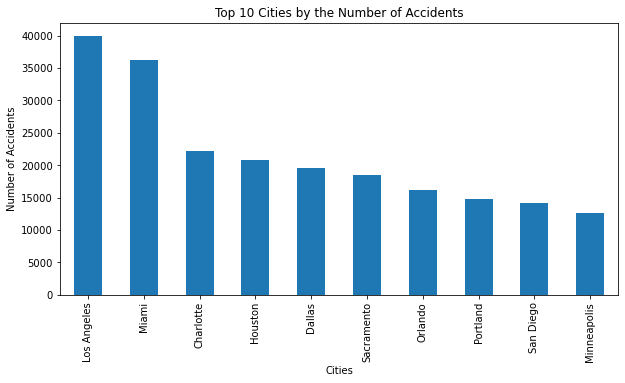

In [10]:
# Visualising top 10 cities by the number of accidents
fig, ax = plt.subplots(figsize=(10,5))
accidents_by_cities[:10].plot(kind='bar')
plt.xlabel('Cities')
plt.ylabel('Number of Accidents')
plt.title('Top 10 Cities by the Number of Accidents');

Text(0.5, 1.0, 'Accidents Count Distribution')

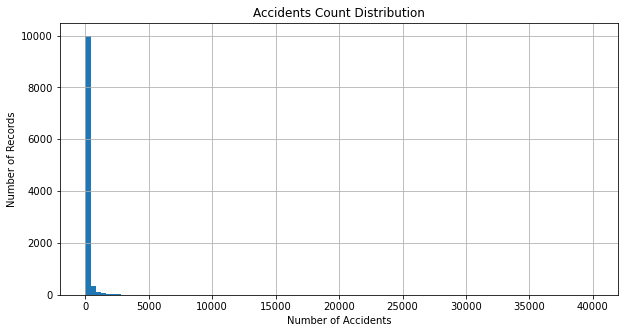

In [11]:
# Accidents count distribution 

fig, ax = plt.subplots(figsize=(10,5))
accidents_by_cities.hist(bins=100)
plt.xlabel("Number of Accidents")
plt.ylabel("Number of Records")
plt.title('Accidents Count Distribution')

# the majority of all the cities have less than 5000 accidents and the the most number of records is less than 2500

In [12]:
# Accidents number by severity level
accidents_severity = df.groupby('Severity').count()['ID']
accidents_severity

Severity
1      28178
2    1212382
3     161052
4     114452
Name: ID, dtype: int64

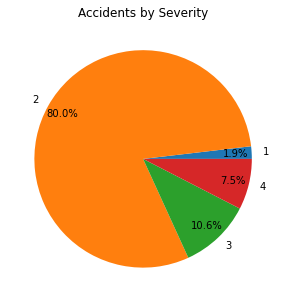

In [13]:
# Pie chart of accidents by severity
fig, ax = plt.subplots(figsize=(10,5))
labels = [1,2,3,4]
plt.pie(accidents_severity, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85)
plt.title('Accidents by Severity')
plt.show()

In [14]:
# Converting Start Time and End Time from obj to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

# Checking
df['Start_Time'].dtypes

dtype('<M8[ns]')

In [15]:
# Creating "Year", "Month", 'Day_Number', "Weekday", "Hour" form "Start_Time" for better visualisations

df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Day_Number'] = df["Start_Time"].dt.day
df['Weekday'] = df["Start_Time"].dt.weekday
df['Hour'] = df['Start_Time'].dt.hour

#Checking
df.loc[:4,['Start_Time', 'Year', 'Month', 'Day_Number', 'Weekday', 'Hour']]

Start_Time  Year  Month  Day_Number  Weekday  Hour
0 2016-02-08 00:37:08  2016      2           8        0     0
1 2016-02-08 05:56:20  2016      2           8        0     5
2 2016-02-08 06:15:39  2016      2           8        0     6
3 2016-02-08 06:15:39  2016      2           8        0     6
4 2016-02-08 06:51:45  2016      2           8        0     6

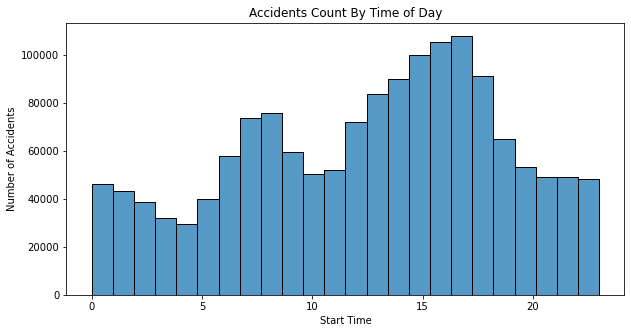

In [16]:
# Visualising accidents by the time of the day
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(df['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Start Time")
plt.ylabel("Number of Accidents")
plt.title('Accidents Count By Time of Day')

plt.show()

# morning peak 8-9a.m. and afternoon peak 4-6p.m.

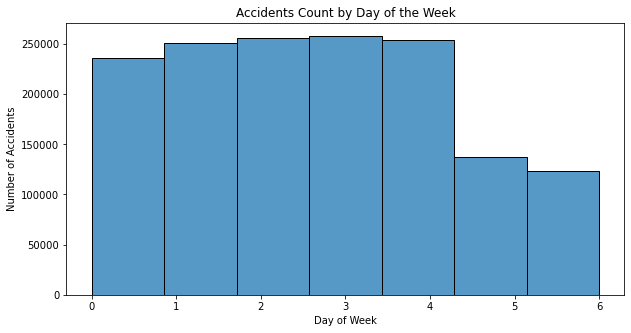

In [17]:
# Visualising accidents by day of the week 

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(df['Start_Time'].dt.dayofweek, bins = 7)

plt.xlabel("Day of Week")
plt.ylabel("Number of Accidents")
plt.title('Accidents Count by Day of the Week')

plt.show()

# most accidents happen Monday to Friday

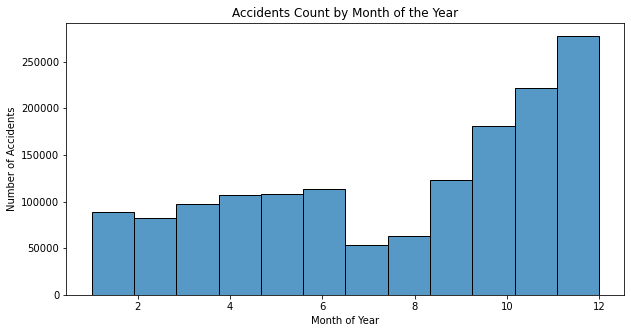

In [18]:
# Visualizing accidents by the month of the year

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(df['Start_Time'].dt.month, bins = 12)

plt.xlabel("Month of Year")
plt.ylabel("Number of Accidents")
plt.title('Accidents Count by Month of the Year')

plt.show()

# decreasing during summer and increasing by winter. The biggest number is during December probably because of Christmas

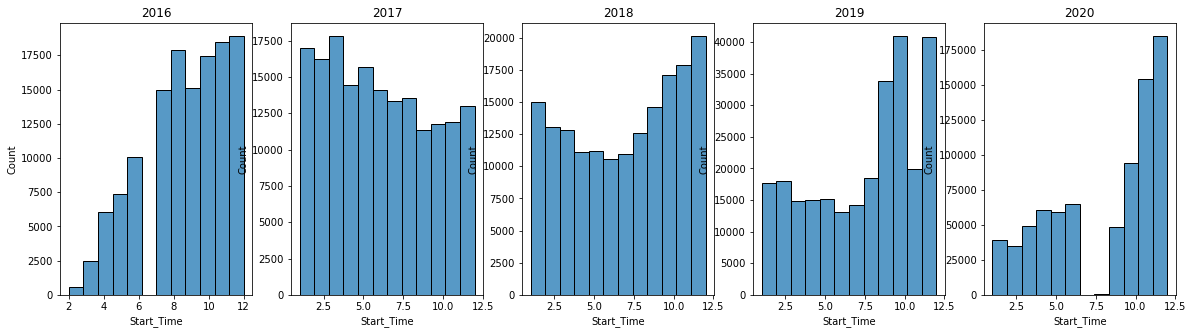

In [19]:
# Visualising years by month of the year

dt_2016 = df[df['Start_Time'].dt.year==2016]
dt_2017 = df[df['Start_Time'].dt.year==2017]
dt_2018 = df[df['Start_Time'].dt.year==2018]
dt_2019 = df[df['Start_Time'].dt.year==2019]
dt_2020 = df[df['Start_Time'].dt.year==2020]

fig, ax = plt.subplots(1,5,figsize=(20, 5))
sns.histplot(dt_2016['Start_Time'].dt.month, bins = 12, ax=ax[0])
sns.histplot(dt_2017['Start_Time'].dt.month, bins = 12, ax=ax[1])
sns.histplot(dt_2018['Start_Time'].dt.month, bins = 12, ax=ax[2])
sns.histplot(dt_2019['Start_Time'].dt.month, bins = 12, ax=ax[3])
sns.histplot(dt_2020['Start_Time'].dt.month, bins = 12, ax=ax[4])
ax[0].set_title("2016")
ax[1].set_title("2017")
ax[2].set_title("2018")
ax[3].set_title("2019")
ax[4].set_title("2020");

# some data is missing probably due imperfection of data sources. 
#in 2020 was it a lockdown or data gathering problem we can only guess.

In [20]:
# Accidents by the side of the road

side_of_road =  df.groupby(['Side']).count()['ID']
side_of_road

Side
L     221502
R    1294562
Name: ID, dtype: int64

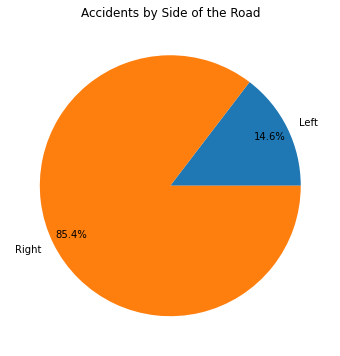

In [21]:
# Pie chart
fig, ax = plt.subplots(figsize=(8, 6))
labels = ['Left', 'Right']
plt.pie(side_of_road, labels=labels, autopct='%1.1f%%', pctdistance=0.85)
plt.title('Accidents by Side of the Road');

In [22]:
# Weather conditions of accidents

weather_conditions = df.groupby(['Weather_Condition']).count()['ID'].sort_values(ascending=False)
weather_conditions

Weather_Condition
Fair                         465252
Mostly Cloudy                193595
Clear                        180223
Cloudy                       161291
Partly Cloudy                133102
                              ...  
Sleet / Windy                     1
Light Fog                         1
Low Drifting Snow                 1
Freezing Rain / Windy             1
Sand / Dust Whirls Nearby         1
Name: ID, Length: 116, dtype: int64

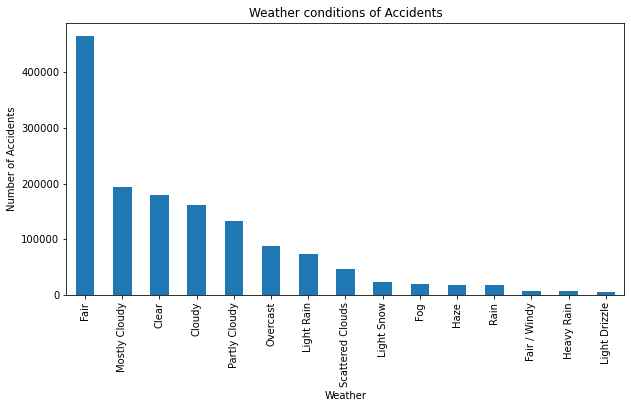

In [23]:
# Visualising weather conditions

fig, ax = plt.subplots(figsize=(10,5))
weather_conditions[:15].plot(kind='bar')
plt.title('Weather conditions of Accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('Weather')
plt.show()

# most accidents happened during fair weather

In [24]:
##Cool map. Try to run the code ****** FILE SUDDENLY CRASHES AT THE END******

# fig = px.density_mapbox(df, lat='Start_Lat', lon='Start_Lng', z='Severity', hover_name='Street', radius=5,
#                         center=dict(lat=40.730610, lon=-73.935242), zoom=6,
#                         mapbox_style="open-street-map", height=900)

# fig.show()

# Data cleanup

As we plan to create a prediction model, columns that contain data related to accidents that already happened seem to have minimum value for us, therefore they can be dropped. Thats why we drop 'Distance(mi)', 'End_Time', 'End_Lat', 'End_Lng'. Also we drop 'ID' and 'Description' as they provide no useful information for future ML model.

In [25]:
df = df.drop(['ID', 'Description', 'Distance(mi)', 'End_Time', 'End_Lat', 'End_Lng'], axis=1)

In [26]:
# Checking categorial features

cat_names = ['Side', 'Country', 'Timezone', 'Amenity', 'Bump', 'Crossing', 
             'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 
             'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 
             'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
print("Unique count of categorical features:")
for i in cat_names:
  print(i,df[i].nunique())

Unique count of categorical features:
Side 2
Country 1
Timezone 4
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 2
Civil_Twilight 2
Nautical_Twilight 2
Astronomical_Twilight 2


Dropping 'Country' and 'Turning_Loop' because they have only one category

In [27]:
df = df.drop(['Country','Turning_Loop'], axis=1)

'Wind_Direction' and 'Weather_Condition' features both have inconsistency, so we need to clean them

In [28]:
# Wind_Direction
df['Wind_Direction'].unique()

array(['SW', 'Calm', 'WSW', 'WNW', 'West', 'NNW', 'South', 'W', 'NW',
       'North', 'SSE', 'SSW', 'ESE', 'SE', nan, 'East', 'Variable', 'NNE',
       'NE', 'ENE', 'CALM', 'S', 'VAR', 'N', 'E'], dtype=object)

In [29]:
# Wind_Direction feature cleaning

df.loc[df['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df.loc[(df['Wind_Direction']=='West')|(df['Wind_Direction']=='WSW')|(df['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df.loc[(df['Wind_Direction']=='South')|(df['Wind_Direction']=='SSW')|(df['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
df.loc[(df['Wind_Direction']=='North')|(df['Wind_Direction']=='NNW')|(df['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
df.loc[(df['Wind_Direction']=='East')|(df['Wind_Direction']=='ESE')|(df['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df.loc[df['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'

# Checking feature after cleaning
df['Wind_Direction'].unique()

array(['SW', 'CALM', 'W', 'N', 'S', 'NW', 'E', 'SE', nan, 'VAR', 'NE'],
      dtype=object)

In [30]:
# Checking Weather_Condition column
df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow',
       'Cloudy', nan, 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain',
       'Heavy Rain', 'Fair', 'Drizzle', 'Fog', 'Thunderstorms and Rain',
       'Patches of Fog', 'Light Thunderstorms and Rain', 'Mist',
       'Rain Showers', 'Light Rain Showers', 'Heavy Drizzle', 'Smoke',
       'Light Freezing Fog', 'Light Freezing Rain', 'Blowing Snow',
       'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Snow Grains',
       'Squalls', 'Light Fog', 'Shallow Fog', 'Thunderstorm',
       'Light Ice Pellets', 'Thunder', 'Thunder in the Vicinity',
       'Fair / Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Light Snow Showers',
       'Cloudy / Windy', 'Ice Pellets', 'N/A Precipitation',
       'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy',
       'Wintry Mix', 'Partly Cloudy / Windy', 'Heavy T-Storm', 'Sand',
       'Ligh

In [31]:
# Weather_Condition cleanup 
weather = '!'.join(df['Weather_Condition'].dropna().unique().tolist())
weather

#Using RegEx to remove indistinctive signs and words 
weather = np.unique(np.array(re.split(
    "!|\s/\s|\sand\s|\swith\s|Partly\s|Mostly\s|Blowing\s|Freezing\s", weather))).tolist()
weather

['',
 'Clear',
 'Cloudy',
 'Drifting Snow',
 'Drizzle',
 'Dust',
 'Dust Whirls',
 'Dust Whirls Nearby',
 'Dust Whirlwinds',
 'Fair',
 'Fog',
 'Funnel Cloud',
 'Hail',
 'Haze',
 'Heavy ',
 'Heavy Drizzle',
 'Heavy Ice Pellets',
 'Heavy Rain',
 'Heavy Rain Shower',
 'Heavy Rain Showers',
 'Heavy Snow',
 'Heavy T-Storm',
 'Heavy Thunderstorms',
 'Ice Pellets',
 'Light ',
 'Light Drizzle',
 'Light Fog',
 'Light Haze',
 'Light Ice Pellets',
 'Light Rain',
 'Light Rain Shower',
 'Light Rain Showers',
 'Light Sleet',
 'Light Snow',
 'Light Snow Shower',
 'Light Snow Showers',
 'Light Thunderstorms',
 'Low Drifting Snow',
 'Mist',
 'N/A Precipitation',
 'Overcast',
 'Partial Fog',
 'Patches of Fog',
 'Rain',
 'Rain Shower',
 'Rain Showers',
 'Sand',
 'Scattered Clouds',
 'Shallow Fog',
 'Showers in the Vicinity',
 'Sleet',
 'Small Hail',
 'Smoke',
 'Snow',
 'Snow Grains',
 'Squalls',
 'T-Storm',
 'Thunder',
 'Thunder in the Vicinity',
 'Thunderstorm',
 'Thunderstorms',
 'Tornado',
 'Volcanic A

In [32]:
# Creating some features out of Weather_Conditions, assigning them to boolean and dropping Weather_condition column
# Combining simmilar weather into new features

df['Clear'] = np.where(df['Weather_Condition'].str.contains('Clear', case=False, na = False), True, False)
df['Cloud'] = np.where(df['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), True, False)
df['Rain'] = np.where(df['Weather_Condition'].str.contains('Rain|storm', case=False, na = False), True, False)
df['Heavy_Rain'] = np.where(df['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), True, False)
df['Snow'] = np.where(df['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), True, False)
df['Heavy_Snow'] = np.where(df['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), True, False)
df['Fog'] = np.where(df['Weather_Condition'].str.contains('Fog', case=False, na = False), True, False)

In [33]:
df['Weather_Condition'].isnull().sum()

44007

In [34]:
# Filling NA in the new features where Weather Conditions vallue was missing
# Converting them to boolean and dropping Weather_Conditions column

weather = ['Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog']
for i in weather:
    df.loc[df['Weather_Condition'].isnull(),i] = df.loc[df['Weather_Condition'].isnull(),'Weather_Condition']
    df[i] = df[i].astype('bool')

## Checking null values 
#df[weather].isnull().sum()

df = df.drop(['Weather_Condition'], axis=1)

In [35]:
# Checking missing values again

missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

Feature  Missing_Percent(%)
4                  Number           69.000715
7                    City            0.005475
10                Zipcode            0.061673
11               Timezone            0.151841
12           Airport_Code            0.280199
13      Weather_Timestamp            1.996222
14         Temperature(F)            2.838469
15          Wind_Chill(F)           29.637007
16            Humidity(%)            3.001786
17           Pressure(in)            2.392643
18         Visibility(mi)            2.916170
19         Wind_Direction            2.760965
20        Wind_Speed(mph)            8.499773
21      Precipitation(in)           33.675953
34         Sunrise_Sunset            0.005475
35         Civil_Twilight            0.005475
36      Nautical_Twilight            0.005475
37  Astronomical_Twilight            0.005475

69% of data in 'Number' and 29% of 'Wind_Chill(F)' is missing, so its better to drop these columns. Although 'Precipitation(in)' also has a lot of missing values, rain may change road conditions and potentially affect the number of accidents, so we leave this column.

In the rest of the features the number of missing values is very small. We can drop missing values.


In [36]:
# Dropping 'Number' and 'Wind_Chill(F)'
df = df.drop(['Number','Wind_Chill(F)'], axis=1)

# Dropping NAs from 'City','Zipcode','Timezone','Airport_Code','Weather_Timestamp','Temperature(F)', 'Humidity(%)',
# 'Pressure(in)','Visibility(mi)','Wind_Direction','Wind_Speed(mph)',
# 'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'
        
df = df.dropna(subset=['City','Zipcode','Timezone','Airport_Code','Weather_Timestamp','Temperature(F)', 'Humidity(%)', 
                       'Pressure(in)','Visibility(mi)','Wind_Direction','Wind_Speed(mph)',
                       'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'])

In [37]:
# As we have a lot of missing dtat in Precipitation feature, we need to replace NaNs  with median value

df['Precipitation_NA'] = 0
df.loc[df['Precipitation(in)'].isnull(),'Precipitation_NA'] = 1
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].median())
df.loc[:5,['Precipitation(in)','Precipitation_NA']]

Precipitation(in)  Precipitation_NA
0               0.00                 0
5               0.01                 0

In [38]:

df.columns

Index(['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'Year', 'Month',
       'Day_Number', 'Weekday', 'Hour', 'Clear', 'Cloud', 'Rain', 'Heavy_Rain',
       'Snow', 'Heavy_Snow', 'Fog', 'Precipitation_NA'],
      dtype='object')

## feature ingeneering and exploration

since level 4 severity is the most serious, let's focus on that and regroup existing levels into 2 categories: level 4 == 1, other levels == 0

In [39]:
# Creating new feature, regrouping and dropping Severity feature
df['Severity_lvl4'] = 0
df.loc[df['Severity'] == 4, 'Severity_lvl4'] = 1
df = df.drop(['Severity'], axis = 1)
df.Severity_lvl4.value_counts()

0    1277214
1      96665
Name: Severity_lvl4, dtype: int64

Above data is imballanced and the dataset is big enough so we can undersample the 0 value and oversample 1. Lets randomly under- and oversample the data to 60000

In [40]:
# Creating resampling function 
def resample(dat, col, n):
    return pd.concat([dat[dat[col]==1].sample(n, replace = True),
                   dat[dat[col]==0].sample(n)], axis=0)

In [41]:
# Resampling
df_balanced = resample(df, 'Severity_lvl4', 10000)

# Checking data 
print(df_balanced.Severity_lvl4.value_counts())

1    10000
0    10000
Name: Severity_lvl4, dtype: int64


Exploring data more deeply, creating graphs

In [42]:
# Visualising accidents count  by year based on severity
df_balanced.Year = df_balanced.Year.astype(str)

sns.countplot(x='Year', hue='Severity_lvl4', data=df_balanced, order=reversed(df_balanced['Year'].value_counts().index))
plt.title('Count of Accidents by Year (resampled data)', size=15, y=1.05)
plt.show()

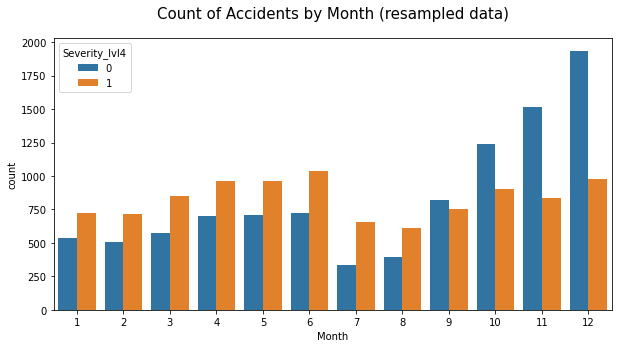

In [43]:
# Count of accidents by month

plt.figure(figsize=(10,5))
sns.countplot(x='Month', hue='Severity_lvl4', data=df_balanced)
plt.title('Count of Accidents by Month (resampled data)', size=15, y=1.05)
plt.show()

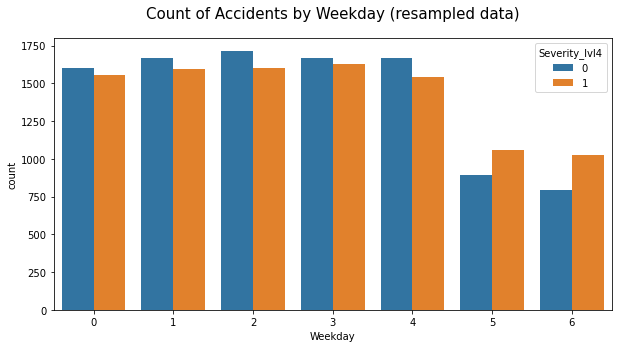

In [44]:
# Count of accidents by Weekday

plt.figure(figsize=(10,5))
sns.countplot(x='Weekday', hue='Severity_lvl4', data=df_balanced)
plt.title('Count of Accidents by Weekday (resampled data)', size=15, y=1.05)
plt.show()

In [45]:
# Count of Accidents by Period-of-Day

period_features = ['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
fig, axs = plt.subplots(ncols=1, nrows=4, figsize=(13, 5))

plt.subplots_adjust(wspace = 0.5)
for i, feature in enumerate(period_features, 1):    
    plt.subplot(1, 4, i)
    sns.countplot(x=feature, hue='Severity_lvl4', data=df_balanced)
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in\n{} Feature'.format(feature), size=13, y=1.05)
fig.suptitle('Count of Accidents by Period-of-Day (resampled data)',y=1.08, fontsize=16)
plt.show()

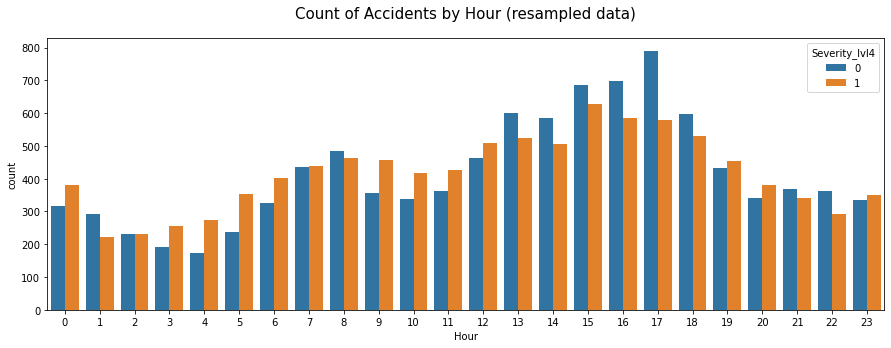

In [46]:
# Count of accidents by Hour

plt.figure(figsize=(15,5))
sns.countplot(x='Hour', hue='Severity_lvl4', data=df_balanced)
plt.title('Count of Accidents by Hour (resampled data)', size=15, y=1.05)
plt.show()

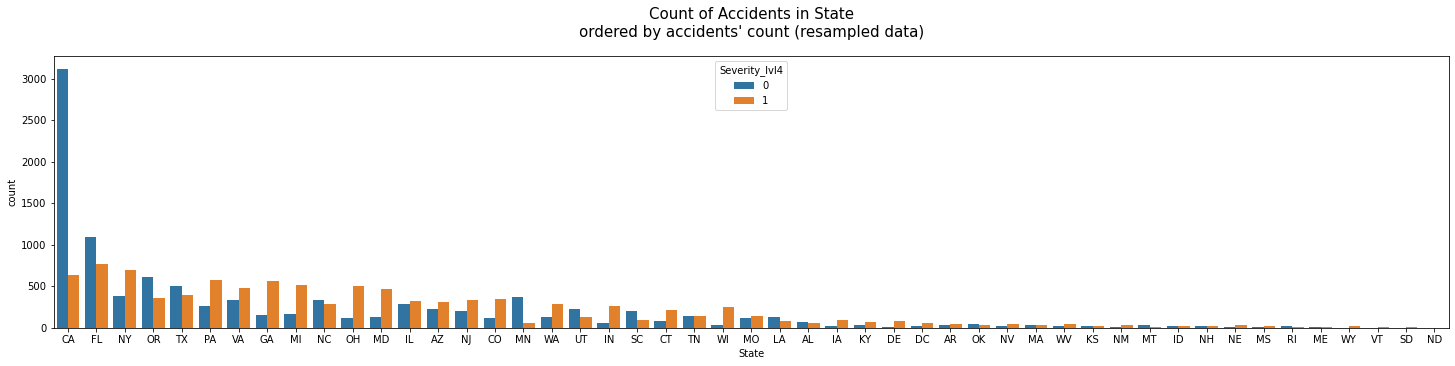

In [47]:
# plotting Accidents in States

plt.figure(figsize=(25,5))
chart = sns.countplot(x='State', hue='Severity_lvl4', 
                      data=df_balanced, order=df_balanced['State'].value_counts().index)
plt.title("Count of Accidents in State\nordered by accidents' count (resampled data)", size=15, y=1.05)
plt.show()

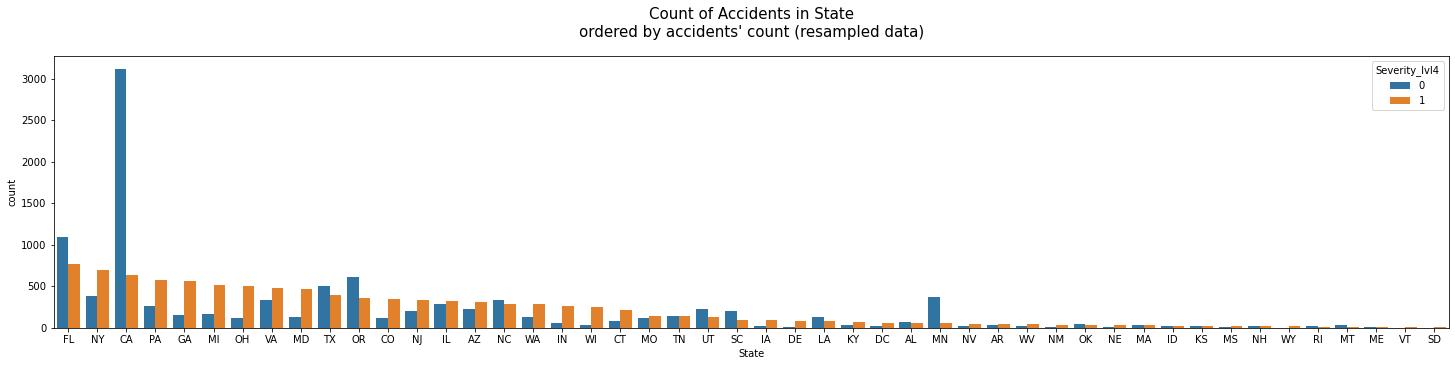

In [48]:
# States by severity

plt.figure(figsize=(25,5))
chart = sns.countplot(x='State', hue='Severity_lvl4', 
                      data=df_balanced, order=df_balanced[df_balanced['Severity_lvl4']==1]['State'].value_counts().index)
plt.title("Count of Accidents in State\nordered by accidents' count (resampled data)", size=15, y=1.05)
plt.show()

In [49]:
# Accidents count by States using Plotly graph objects

fig = go.Figure(
    data=go.Choropleth(
        locations = pd.value_counts(df_balanced['State']).index, 
        z = pd.value_counts(df_balanced['State']).values.astype(float), 
        locationmode = 'USA-states', 
        colorscale = 'reds', 
        colorbar_title = " Accident Counts"), 
    
    layout=go.Layout(
        title_text='Accidents Count by States (Feb 2016—Dec 2020)', 
        title_x=0.5, 
        font=dict(family='Calibri', size=14, color='MidnightBlue'), 
        geo_scope='usa'))

fig.show()

In [50]:
#Cool map. Try to run the code

fig = px.density_mapbox(df_balanced, lat='Start_Lat', lon='Start_Lng', z='Severity_lvl4', hover_name='Street', radius=1,
                        center=dict(lat=38.657730, lon=-96.917152), zoom=3,
                        mapbox_style="open-street-map", height=900)

fig.show()

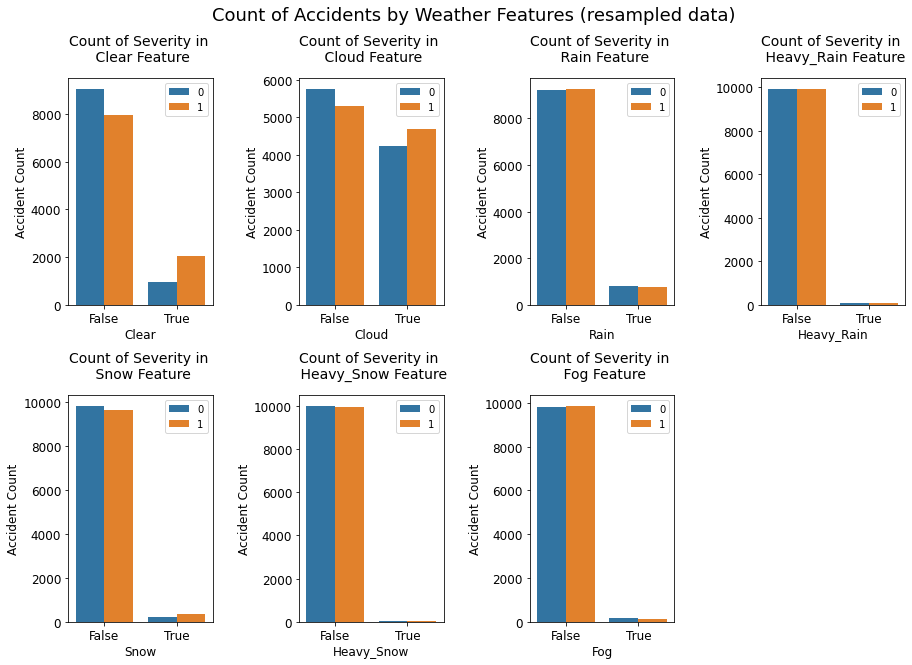

In [51]:
# plotting weather correlation to severity

fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.6)
for i, feature in enumerate(weather, 1):    
    plt.subplot(2, 4, i)
    sns.countplot(x=feature, hue='Severity_lvl4', data=df_balanced)
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in \n {} Feature'.format(feature), size=14, y=1.05)
fig.suptitle('Count of Accidents by Weather Features (resampled data)', fontsize=18)
plt.show()

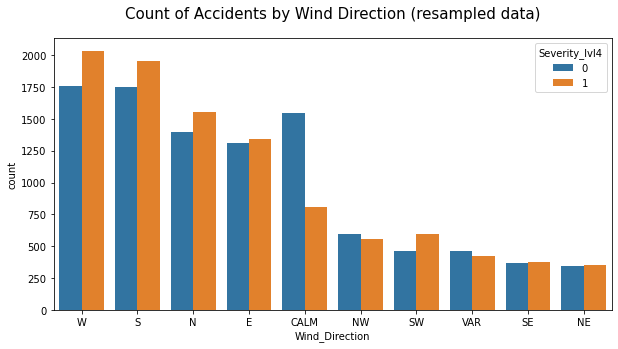

In [52]:
# Severity by wind direction

plt.figure(figsize=(10,5))
chart = sns.countplot(x='Wind_Direction', hue='Severity_lvl4', data=df_balanced, 
                      order=df_balanced['Wind_Direction'].value_counts().index)
plt.title("Count of Accidents by Wind Direction (resampled data)", size=15, y=1.05)
plt.show()

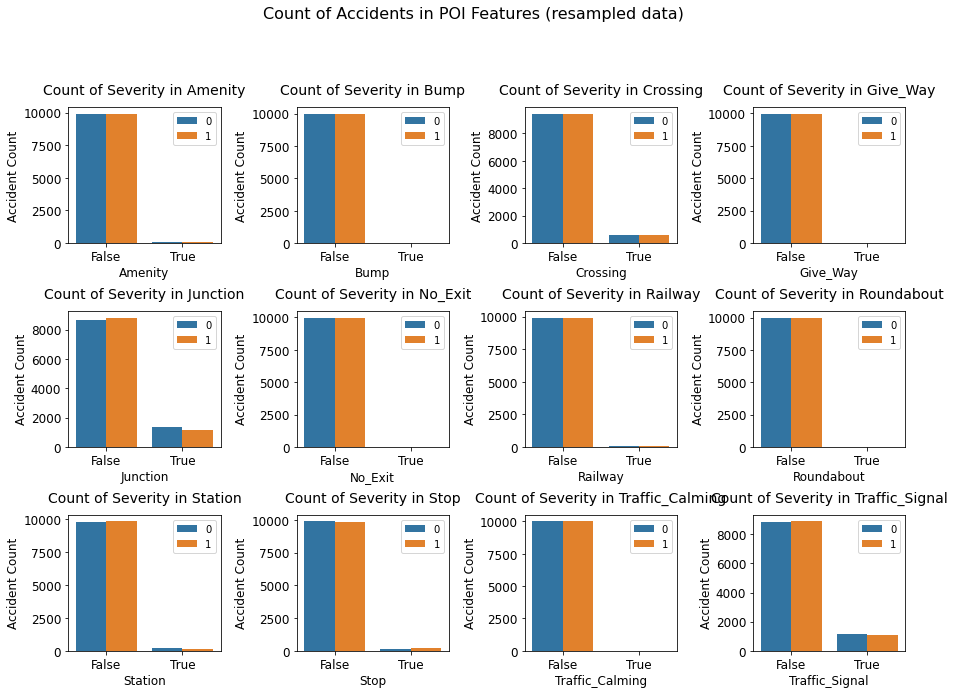

In [53]:
# Plotting count severity by road features

road_features = ['Amenity','Bump','Crossing','Give_Way','Junction',
                'No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal']

fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(15, 10))

plt.subplots_adjust(hspace=0.5,wspace = 0.5)
for i, feature in enumerate(road_features, 1):    
    plt.subplot(3, 4, i)
    sns.countplot(x=feature, hue='Severity_lvl4', data=df_balanced)
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in {}'.format(feature), size=14, y=1.05)
fig.suptitle('Count of Accidents in POI Features (resampled data)',y=1.02, fontsize=16)
plt.show()

The plots above show us that accidents mostly happen near to crossings, junctions and traffic signals. The rest of the features have slight effect or no effect at all mostly due to imbalance of data. 
We can drop some of features in our case.

In [54]:
# Dropping some road features with almost no accidents

df_balanced = df_balanced.drop(['Amenity','Bump','Give_Way','No_Exit', 'Railway','Roundabout','Traffic_Calming'], axis=1)

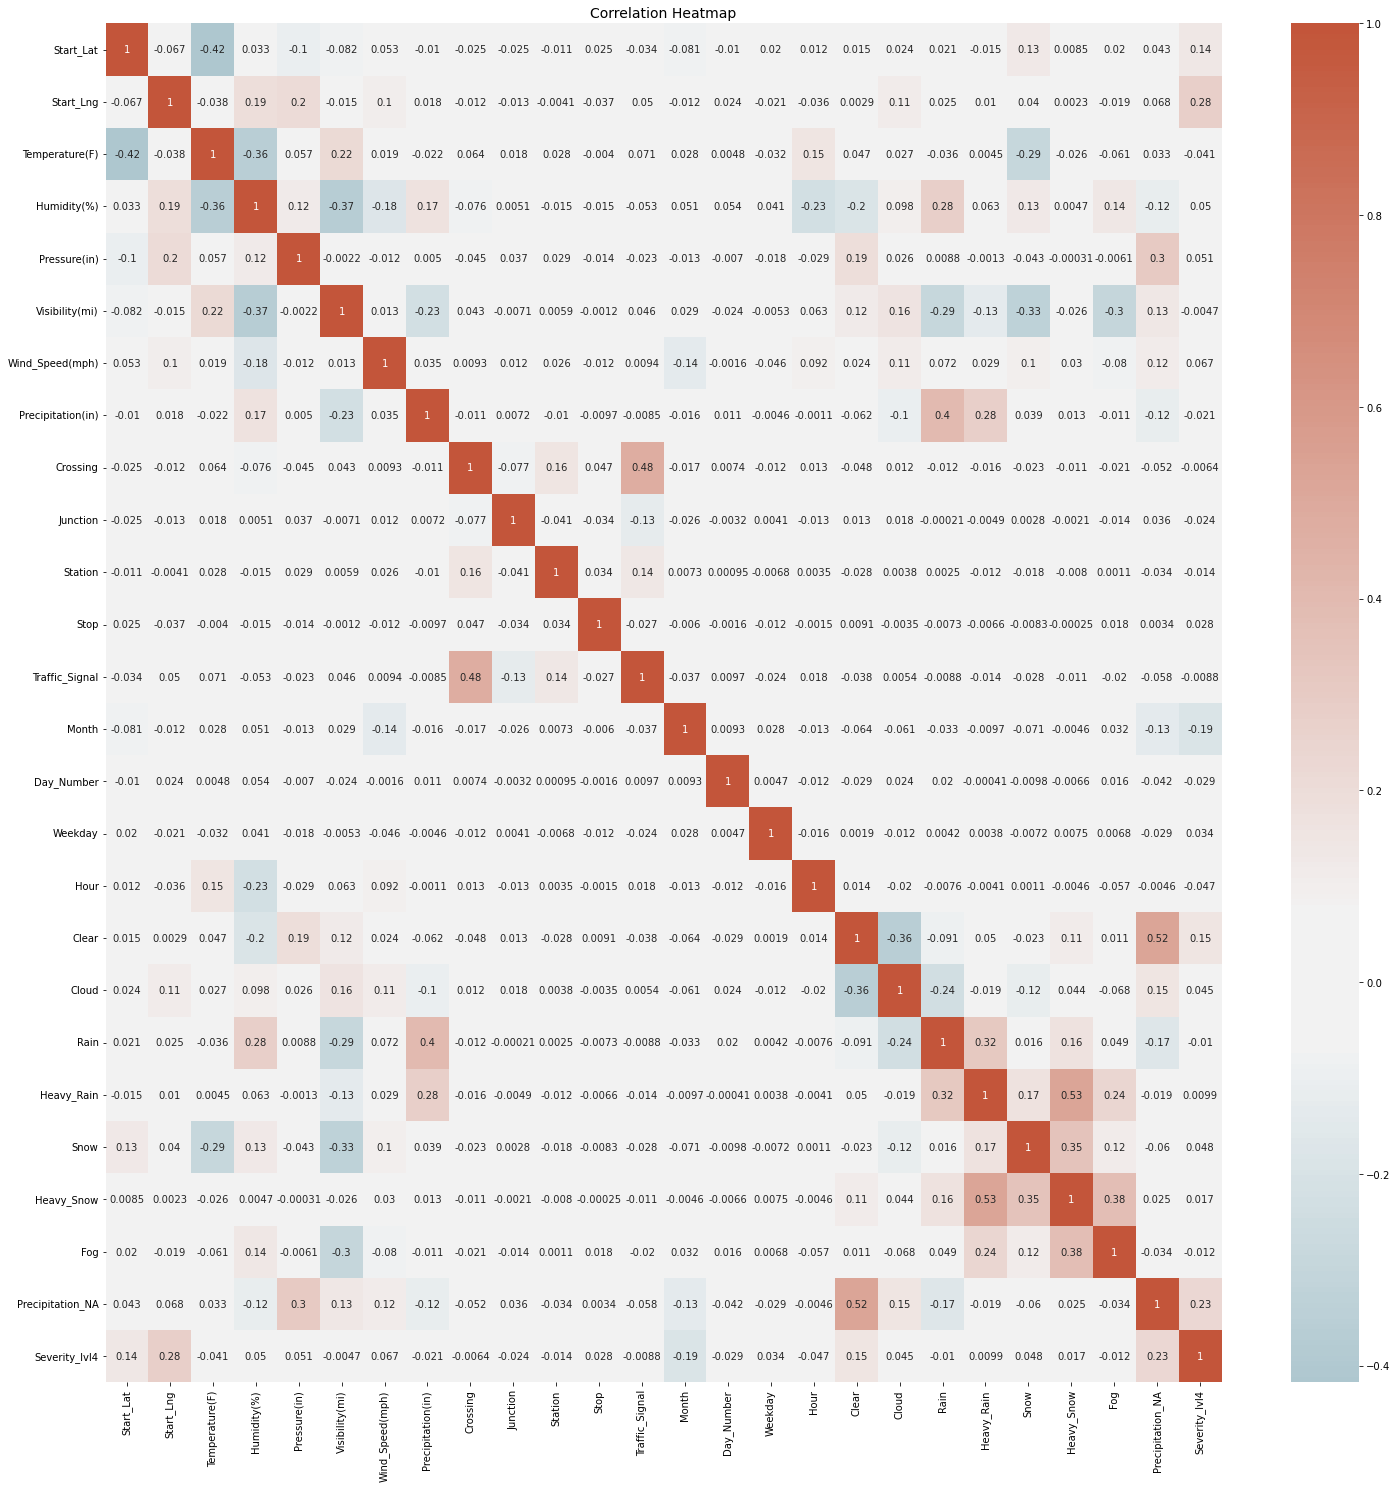

In [55]:
# Creating the heat map to find out correlation between all the features

plt.figure(figsize=(25,25))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df_balanced.corr(), annot=True,cmap=cmap, center=0).set_title("Correlation Heatmap", fontsize=14)
plt.show()

# ML model

In [56]:
# checking data types
df_balanced.dtypes


Start_Time               datetime64[ns]
Start_Lat                       float64
Start_Lng                       float64
Street                           object
Side                             object
City                             object
County                           object
State                            object
Zipcode                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp                object
Temperature(F)                  float64
Humidity(%)                     float64
Pressure(in)                    float64
Visibility(mi)                  float64
Wind_Direction                   object
Wind_Speed(mph)                 float64
Precipitation(in)               float64
Crossing                           bool
Junction                           bool
Station                            bool
Stop                               bool
Traffic_Signal                     bool
Sunrise_Sunset                   object


In [57]:
df_balanced.columns

Index(['Start_Time', 'Start_Lat', 'Start_Lng', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Crossing', 'Junction', 'Station', 'Stop',
       'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'Year', 'Month',
       'Day_Number', 'Weekday', 'Hour', 'Clear', 'Cloud', 'Rain', 'Heavy_Rain',
       'Snow', 'Heavy_Snow', 'Fog', 'Precipitation_NA', 'Severity_lvl4'],
      dtype='object')

In [58]:
# Converting some features' data types

df_balanced[['Year', 'Month','Day_Number', 'Weekday', 'Hour']] = df_balanced[
    ['Year', 'Month','Day_Number', 'Weekday', 'Hour']].astype(float)

df_balanced[['Side', 'Wind_Direction']] = df_balanced[['Side', 'Wind_Direction']].astype('category')

Start_Lat                     float64
Start_Lng                     float64
Side                         category
Temperature(F)                float64
Humidity(%)                   float64
Pressure(in)                  float64
Visibility(mi)                float64
Wind_Direction               category
Wind_Speed(mph)               float64
Precipitation(in)             float64
Crossing                         bool
Junction                         bool
Station                          bool
Stop                             bool
Traffic_Signal                   bool
Year                          float64
Month                         float64
Day_Number                    float64
Weekday                       float64
Hour                          float64
Clear                            bool
Cloud                            bool
Rain                             bool
Heavy_Rain                       bool
Snow                             bool
Heavy_Snow                       bool
Fog         

In [ ]:
# Creating new feature, regrouping and dropping original feature

astro_features = ['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight', 'Astronomical_Twilight']

for feature in astro_features:
    df_balanced[feature+'_cat'] = 0
    df_balanced.loc[df[feature] == "Day", feature+'_cat'] = 1
    df_balanced = df_balanced.drop([feature], axis=1)
# df_balanced.dtypes

In [ ]:
# The number of features has too many unique values and can be labeled by their frequency.
# Frequency encoding and log-transform

fre_list = ['Street', 'City', 'County', 'Zipcode', 'Airport_Code','State', 'Timezone', 'Weather_Timestamp']
for i in fre_list:
    newname = i + '_Freq'
    df_balanced[newname] = df_balanced.groupby([i])[i].transform('count')
    df_balanced[newname] = df_balanced[newname]/df.shape[0]*df_balanced[i].unique().size
    df_balanced[newname] = df_balanced[newname].apply(lambda x: np.log(x+1))
    df_balanced = df_balanced.drop([i], axis=1)
# df_balanced.dtypes

In [ ]:
# Dropping Start Time because we extracted all the information from there
df_balanced = df_balanced.drop(['Start_Time'], axis=1)
df_balanced.dtypes

In [59]:
# Checking missing values again
df_balanced.isna().sum()

Start_Lat                    0
Start_Lng                    0
Side                         0
Temperature(F)               0
Humidity(%)                  0
Pressure(in)                 0
Visibility(mi)               0
Wind_Direction               0
Wind_Speed(mph)              0
Precipitation(in)            0
Crossing                     0
Junction                     0
Station                      0
Stop                         0
Traffic_Signal               0
Year                         0
Month                        0
Day_Number                   0
Weekday                      0
Hour                         0
Clear                        0
Cloud                        0
Rain                         0
Heavy_Rain                   0
Snow                         0
Heavy_Snow                   0
Fog                          0
Precipitation_NA             0
Severity_lvl4                0
Sunrise_Sunset_cat           0
Civil_Twilight_cat           0
Nautical_Twilight_cat        0
Astronom

In [60]:
# Create features for ML model
# One Hot Encoding, using get dummies

# Create our features
converted_df = pd.get_dummies(df_balanced, columns=['Side','State_Freq','City_Freq','Year', 
                                                    'Month','Day_Number', 'Weekday', 'Hour','Wind_Direction'])
X = converted_df

# Creating target
y = df_balanced['Severity_lvl4']

In [61]:
converted_df.columns

Index(['Start_Lat', 'Start_Lng', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Crossing', 'Junction',
       ...
       'Wind_Direction_CALM', 'Wind_Direction_E', 'Wind_Direction_N',
       'Wind_Direction_NE', 'Wind_Direction_NW', 'Wind_Direction_S',
       'Wind_Direction_SE', 'Wind_Direction_SW', 'Wind_Direction_VAR',
       'Wind_Direction_W'],
      dtype='object', length=255)

In [63]:
# Check the balance of our target values
y.value_counts()

1    10000
0    10000
Name: Severity_lvl4, dtype: int64

In [64]:
# Splitting into test and train data

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(15000, 255)

In [66]:
# Creating Logistic regression model

classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

In [67]:
# Fit (train) the model using the training data

classifier.fit(X_train, y_train)

C:\Users\user\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=200, random_state=1)

In [68]:
# Evaluate the model
y_pred = classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 1.000


In [71]:
# Trying Random Forest

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [72]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 1.000
